# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [443]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [444]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [445]:
### reading the data

df = pd.read_csv('/content/drive/My Drive/MIT DSS/Week 1/FoodHub_assignment/foodhub_order.csv')

# first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [446]:
# ... and last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [447]:
df.shape

(1898, 9)

#### Observations:

Our data set has 1898 rows and 9 columns.



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [448]:
# types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

We have 4 `object`, 1 `float` and 2 `int` type variables in our data set (order_id and customer_id excluded), of which each has 1898 observations.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [449]:
# counting all nan values
(df.isnull()).sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [450]:
# this 'for' function simplifies our work; we get a value_counts() for each column of the data set
for i in df.columns:
  print(df[i].value_counts())
  print('-'* 55)
  print('\n')

1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: order_id, Length: 1898, dtype: int64
-------------------------------------------------------


52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64
-------------------------------------------------------


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
-------------------------------------------------------


American          584
Japanese         

In [451]:
# this for function prints out the number of 'Not given' values for all columns
for i in df.columns:
  print('Number of missing values for', i, 'is:', (df[i] == 'Not given').sum())
  print('-' * 60)

Number of missing values for order_id is: 0
------------------------------------------------------------
Number of missing values for customer_id is: 0
------------------------------------------------------------
Number of missing values for restaurant_name is: 0
------------------------------------------------------------
Number of missing values for cuisine_type is: 0
------------------------------------------------------------
Number of missing values for cost_of_the_order is: 0
------------------------------------------------------------
Number of missing values for day_of_the_week is: 0
------------------------------------------------------------
Number of missing values for rating is: 736
------------------------------------------------------------
Number of missing values for food_preparation_time is: 0
------------------------------------------------------------
Number of missing values for delivery_time is: 0
------------------------------------------------------------


#### Observations:

There seems to be no missing values for other variables, except `'rating'`.

The `df.info()` output shows that rating is a `'object'` type, whilst it should either be an `int` or `float` type.

The `value_counts` function allows us to clearly distinguish unique values from one another.

##### **Dealing with missing values**

There are certain methods we can use to deal with missing values:

*   replacing nan values with the mode or average value of that category (not optimal, since "assuming" an order's rating would lead to biased conlcusions);
*   removing observations with missing values if the sample size is big enough and sample selection is representative of the population (more preferable);
*   removing the variable out of our analysis altogether (not optimal, since `'rating'` is an important variable for our analysis);
*   etc.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [452]:
# let's see how many observations we have for the int and float variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

The fastest time food was prepared for a customer in our data was 20 minutes (minimum).

The longest time it took to prepare another customer's food was 35 minutes (maximum).

On average, it takes around 27 minutes to prepare a meal for someone.

### **Question 5:** How many orders are not rated?

In [453]:
a = (df['rating'] == 'Not given').sum() # 'Not given' values in variable 'rating'
b = len(df['rating']) # all observations in rating

print('Number of unrated orders:', a)
print('Total number of orders:', b)
print('\n')
print('Percentage of unrated orders compared to total amount of orders:', round(a/b*100, 2))

Number of unrated orders: 736
Total number of orders: 1898


Percentage of unrated orders compared to total amount of orders: 38.78


#### Observations:

736 out of 1898 orders have no given rating. That is around two fifths of total observations.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

### *Histograms:*

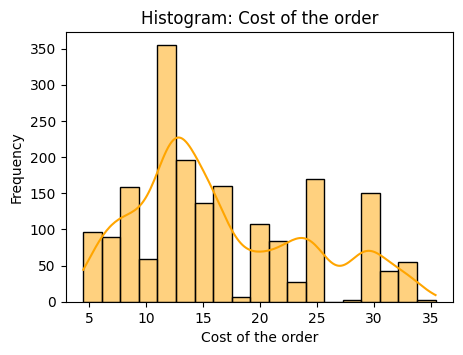

In [454]:
plt.figure(figsize=(5,3.5)) # this size seems more appropriate and compact
plt.title('Histogram: Cost of the order')
plt.xlabel('Cost of the order')
plt.ylabel('Frequency')
sns.histplot(data=df, x='cost_of_the_order',color='orange', kde=True);

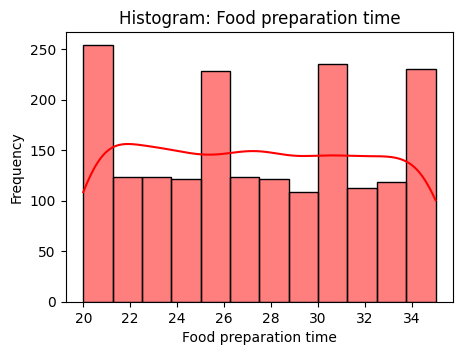

In [455]:
plt.figure(figsize=(5,3.5))
plt.title('Histogram: Food preparation time')
plt.xlabel('Food preparation time')
plt.ylabel('Frequency')
sns.histplot(data=df, x='food_preparation_time',color='red', kde=True);

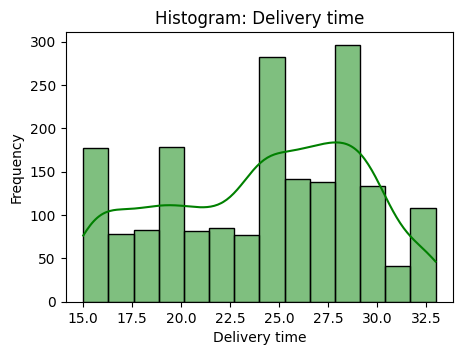

In [456]:
plt.figure(figsize=(5,3.5))
plt.title('Histogram: Delivery time')
plt.xlabel('Delivery time')
plt.ylabel('Frequency')
sns.histplot(data=df, x='delivery_time',color='green', kde=True);

#### Observations:

We use histograms to easily display the distribution of our float and int variables.

One may observe that neither of them are normally distributed (there is no *bell shape* in their distribution). Applying the `kde` feature to the distribution, we notice that `food_preparation_time` is somewhat uniformly distributed although not entirely.

### *Boxplots:*

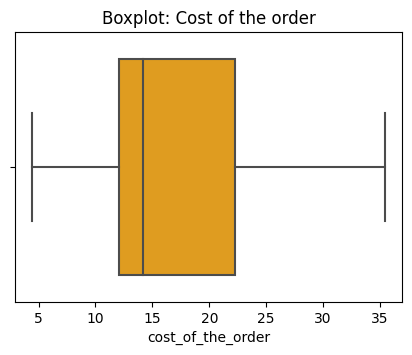

In [457]:
plt.figure(figsize=(5,3.5))
plt.title('Boxplot: Cost of the order')
plt.xlabel('Cost of the order')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='cost_of_the_order',color='orange');

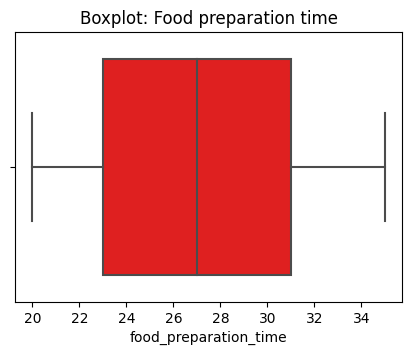

In [458]:
plt.figure(figsize=(5,3.5))
plt.title('Boxplot: Food preparation time')
plt.xlabel('Food preparation time')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='food_preparation_time',color='red');

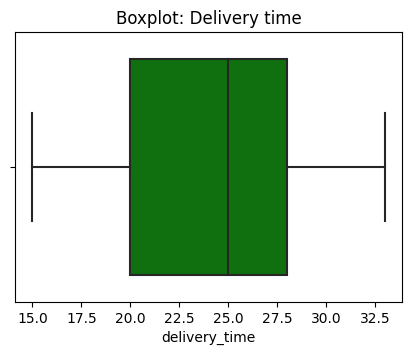

In [459]:
plt.figure(figsize=(5,3.5))
plt.title('Boxplot: Delivery time')
plt.xlabel('Delivery time')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='delivery_time',color='green');

#### Observations:

Boxplot graphs indicate that there are no extreme outliers in our data; hence all observations lie in a certain range.

Two variables show some signs of *skewness*, namely `cost_of_the_order` and `delivery_time`.

### *Countplots:*

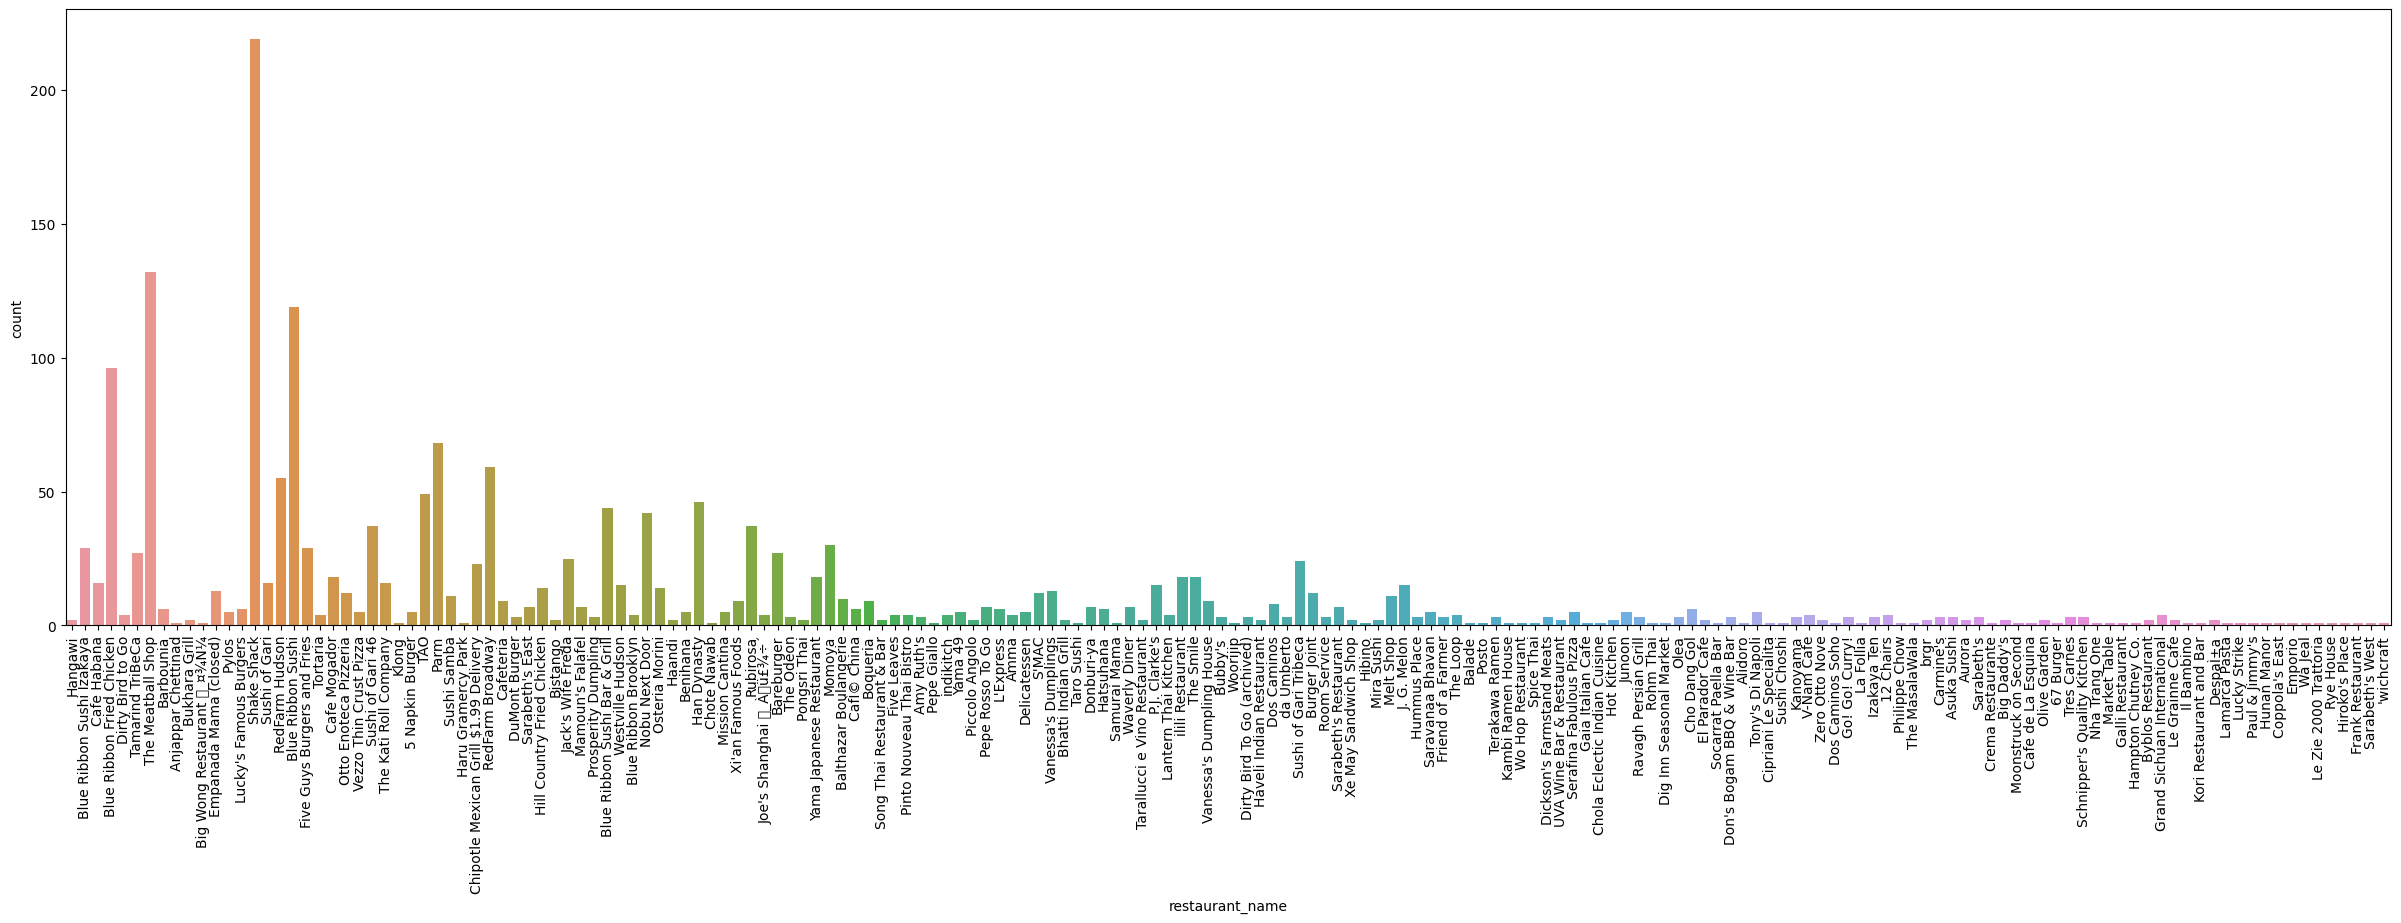

In [460]:
plt.figure(figsize=(30,8)) # this size seems more appropriate for the large number of unique observations (i.e. restaurants)
sns.countplot(data=df, x='restaurant_name')
plt.xticks(rotation=90)
plt.show()

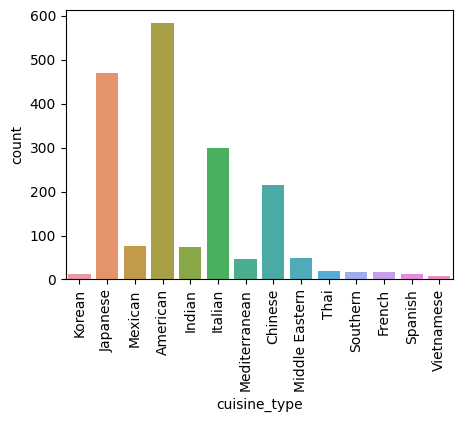

In [461]:
plt.figure(figsize=(5,3.5))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

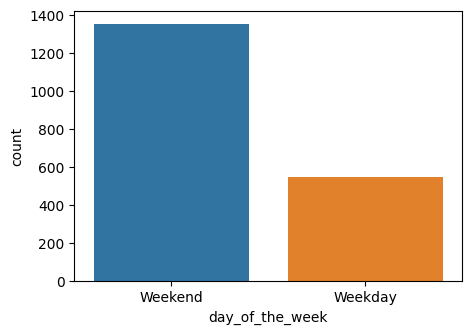

In [462]:
plt.figure(figsize=(5,3.5))
sns.countplot(data=df, x='day_of_the_week')
plt.show()

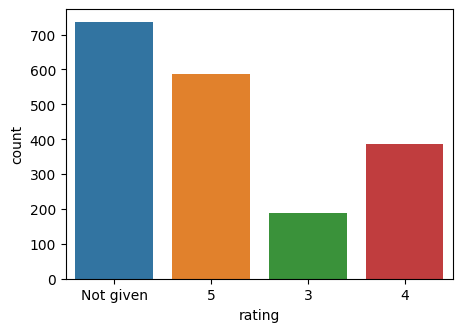

In [463]:
plt.figure(figsize=(5,3.5))
sns.countplot(data=df, x='rating')
plt.show()

#### Observations:

We have used bar graphs to visually display the distribution of qualitative or non-numerical data for variables: `'restaurant_name'`, `'cuisine_type'`, `'day_of_the_week'` and `'rating'` (this last one is considered qualitative, because of the *Not given* values we have prevously discussed).

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [464]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:

Top 5 restaurants with the most order are:

*   **"Shake Shack"** with 219
*   **"The Meatball Shop"** with 132
*   **"Blue Ribbon Sushi**" with 119
*   **"Blue Ribbon Fried Chicken"** with 96
*   **"Parm"** with 68

This may also be observed visually through the large bar graph.

### **Question 8**: Which is the most popular cuisine on weekends?

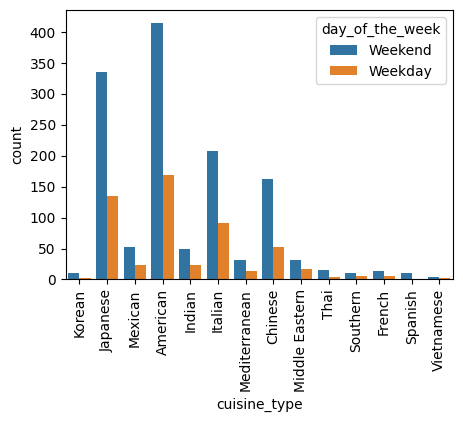

In [465]:
# visual overview
plt.figure(figsize=(5,3.5))
sns.countplot(data=df, x='cuisine_type', hue = 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

In [466]:
# new subset: American cuisine AND Weekend
df_american_weekend = df[(df['cuisine_type'] == 'American') & (df['day_of_the_week'] == 'Weekend')]

print('Number of American food orders on weekends:', len(df_american_weekend))

Number of American food orders on weekends: 415


#### Observations:

The bar graph with the `hue` function shows that American cuisine is the most popular choice for customers both on weekdays and weekends.

According to our data, **415** orders of *American food were made on weekends.*

### **Question 9**: What percentage of the orders cost more than 20 dollars?

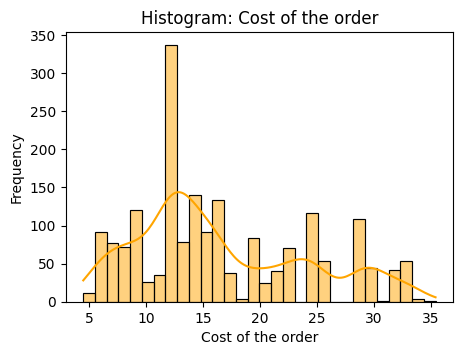

In [467]:
# visual overview
plt.figure(figsize=(5,3.5))
plt.title('Histogram: Cost of the order')
plt.xlabel('Cost of the order')
plt.ylabel('Frequency')
sns.histplot(data=df, x='cost_of_the_order',color='orange', kde=True, bins = 30);

In [468]:
df_cost_more_twenty = df[(df['cost_of_the_order'] > 20)] # data subset of orders that cost more than 20 dollars
df_cost_less_twenty = df[(df['cost_of_the_order'] <= 20)] # data subset of orders that cost 20 dollars or less

print('Number of orders that cost more than 20 dollars:', len(df_cost_more_twenty))
print('Number of orders that cost 20 dollars or less:', len(df_cost_less_twenty))
print('Percentage of orders that cost more than 20 dollars:', round(len(df_cost_more_twenty) / len(df['cost_of_the_order']) * 100, 2))

Number of orders that cost more than 20 dollars: 555
Number of orders that cost 20 dollars or less: 1343
Percentage of orders that cost more than 20 dollars: 29.24


In [469]:
# Proof that we did not lose any observations: both subsets must be equal to total number of observations
if len(df_cost_more_twenty) + len(df_cost_less_twenty) == len(df['cost_of_the_order']):
  print('True')
else:
  print('False')

True


#### Observations:

29.24% of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [470]:
print('Mean order delivery time:', round(df['delivery_time'].mean(), 2))

Mean order delivery time: 24.16


#### Observations:

On average, it will take an order 24.16 minutes to arrive at its destination.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [471]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:

Top three customers have the following id numbers: '**52832**', '**47440**' and '**83287**', ordering 13, 10 and 9 times respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

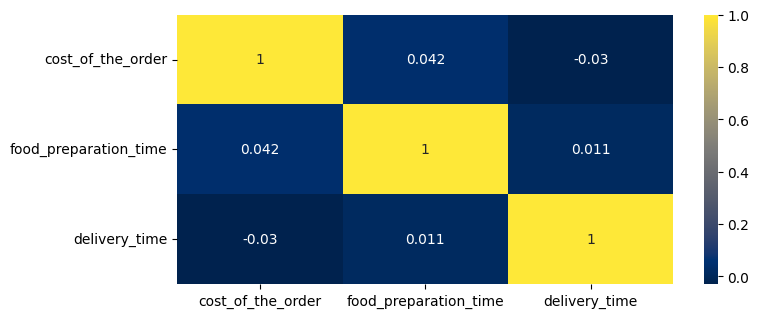

In [472]:
plt.figure(figsize=(8,3.5))
heatmap = sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='cividis')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0)

plt.show()

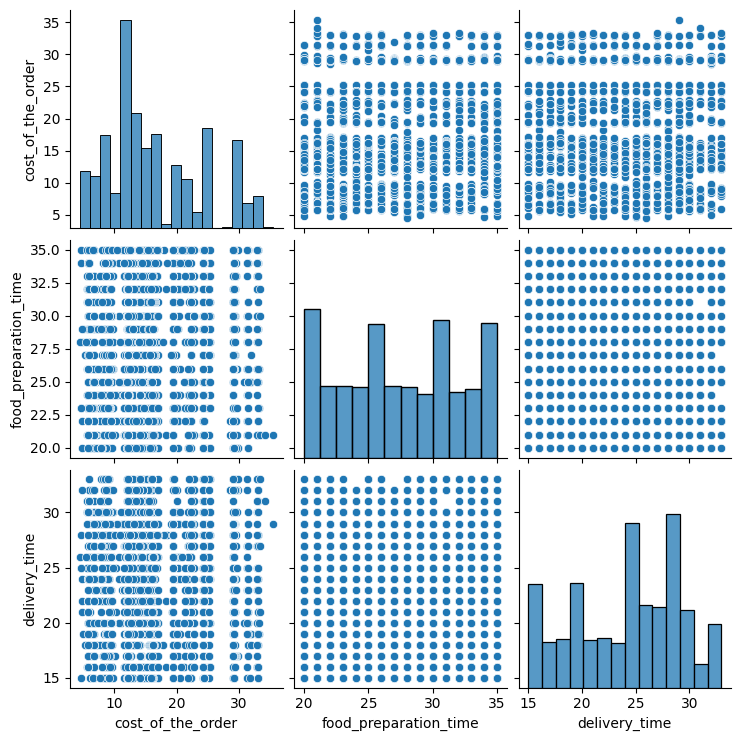

In [473]:
sns.pairplot(data=df[['cost_of_the_order', 'food_preparation_time','delivery_time']]);

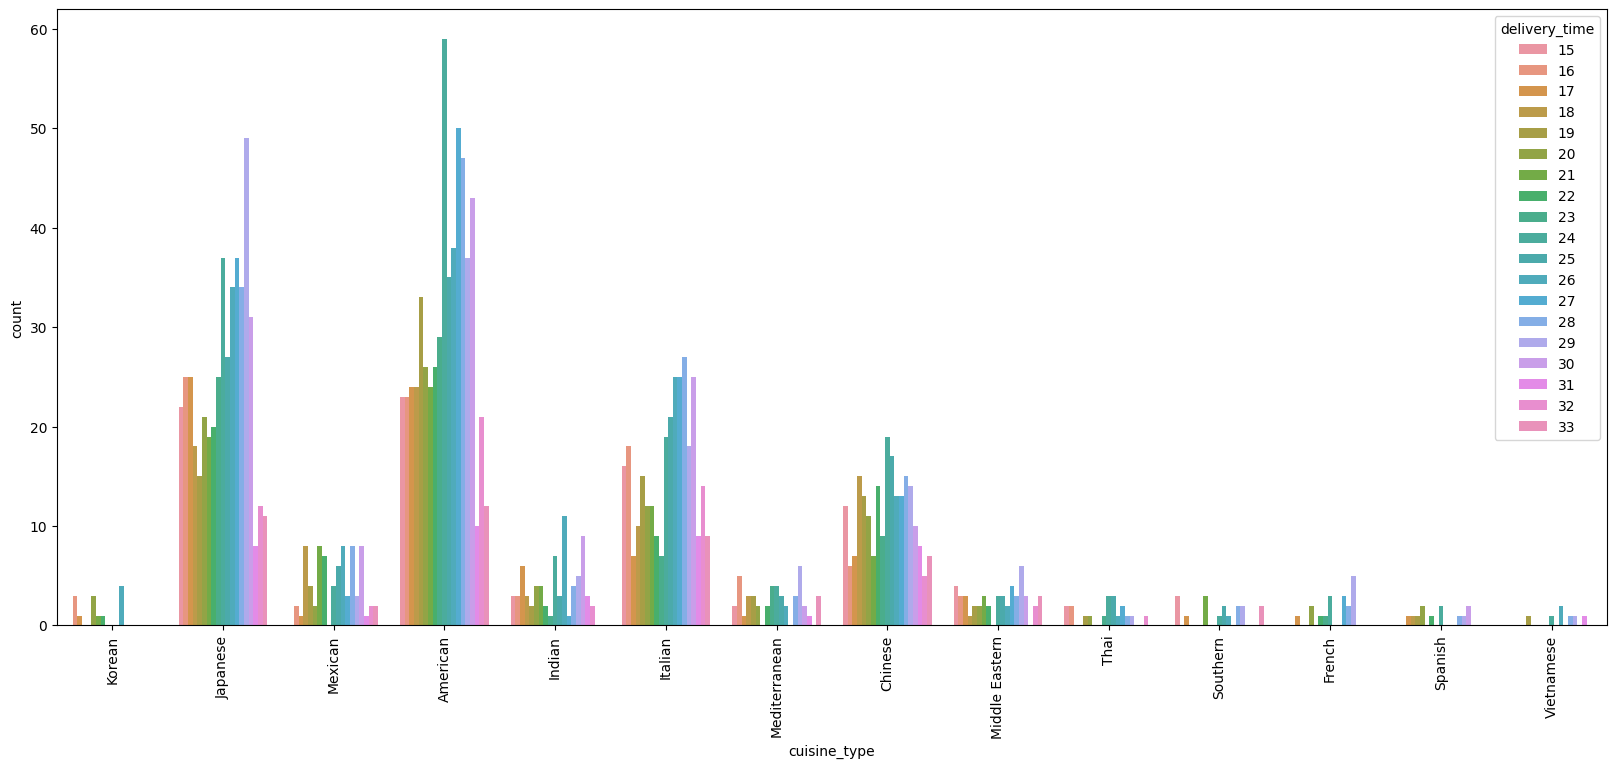

In [474]:
# visual overview
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='cuisine_type', hue = 'delivery_time')
plt.xticks(rotation=90)
plt.show()

#### Observations:

There seems to be *no strong correlation* between any of our numerical variables. This can be proven by our correlation matrix, as well as the given pairplot. The scatterplots do not show any relationship between the variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [475]:
# creating a subset of data without the missing values for 'rating'
df_rating_new = df[(df['rating'] != 'Not given')]

# ensuring NaN values are omitted
df_rating_new['rating'] = pd.to_numeric(df_rating_new['rating'], errors='coerce')

print(df_rating_new['rating'].value_counts())
print(len(df_rating_new))

5    588
4    386
3    188
Name: rating, dtype: int64
1162


In [476]:
df_rating_new.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [477]:
df_rating_new['rating'].astype(int)

2       5
3       3
4       4
5       3
7       3
       ..
1889    3
1890    5
1893    5
1894    5
1896    5
Name: rating, Length: 1162, dtype: int64

In [478]:
# average ratings for each restaurant
rating_mean_by_cuisine = df_rating_new.groupby('cuisine_type')['rating'].mean()

# number of ratings for each restaurant
rating_count = df_rating_new.groupby('cuisine_type')['rating'].sum()

print('Restaurants ranked by average rating:', '\n', rating_mean_by_cuisine)
print('-' * 40)
print('Restaurants ranked by number of ratings:', '\n', rating_count)

Restaurants ranked by average rating: 
 cuisine_type
American          4.298913
Chinese           4.338346
French            4.300000
Indian            4.540000
Italian           4.360465
Japanese          4.373626
Korean            4.111111
Mediterranean     4.218750
Mexican           4.416667
Middle Eastern    4.235294
Southern          4.307692
Spanish           4.833333
Thai              4.666667
Vietnamese        4.000000
Name: rating, dtype: float64
----------------------------------------
Restaurants ranked by number of ratings: 
 cuisine_type
American          1582
Chinese            577
French              43
Indian             227
Italian            750
Japanese          1194
Korean              37
Mediterranean      135
Mexican            212
Middle Eastern     144
Southern            56
Spanish             29
Thai                42
Vietnamese          20
Name: rating, dtype: int64


#### Observations:

1.   It seems that all of our cuisine types have an average rating over 4, except `Vietnamese`.
2.   As per our second condition, cuisines that have more than 50 ratings include: `American, Chinese, Indian, Italian, Japanese, Mediterranean, Mexican, Middle Eastern, Southern.`

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [479]:
df_25 = df[df['cost_of_the_order'] >= 20]
df_15 = df[(df['cost_of_the_order'] >= 5) & (df['cost_of_the_order'] < 20)]

# Number of companies for each category
print('Number of companies that get charged 25%:', len(df_25))
print('Number of companies that get charged 15%:', len(df_15))

Number of companies that get charged 25%: 555
Number of companies that get charged 15%: 1334


In [480]:
## Let's see how much the company gets from each order

# creating a new subset of data which gives the charging amount of each order based on its cost
charge_25 = df_25['cost_of_the_order'] * 0.25
charge_15 = df_15['cost_of_the_order'] * 0.15

# Total revenue will be the sum of all charges for both subsets

revenue = charge_25.sum() + charge_15.sum()

print('Total revenue:', revenue)

Total revenue: 6166.303


#### Observations:

Almost all restaurants get charged by the company, based on their costs. This may serve as a great source of income for the company.

In total, the company generates $6166.30 from its charging policies.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [481]:
# creating a new df
df_total_time = df[['food_preparation_time', 'delivery_time']].copy()

# adding a new column 'total time' that adds both original variables together
df_total_time['total_time'] = df['food_preparation_time'] + df['delivery_time']

print(df_total_time.head())
print('Average time:', df_total_time['total_time'].mean())

   food_preparation_time  delivery_time  total_time
0                     25             20          45
1                     25             23          48
2                     23             28          51
3                     25             15          40
4                     25             24          49
Average time: 51.53371970495258


In [482]:
percentage = len(df_total_time[df_total_time['total_time'] > 60]) / len(df_total_time) * 100

print('Percentage of orders that take more than 60 minutes to get delivered:', round(percentage, 2))

Percentage of orders that take more than 60 minutes to get delivered: 10.54


#### Observations:

10.54% of orders take more than 60 minutes to get delivered to their final destination.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

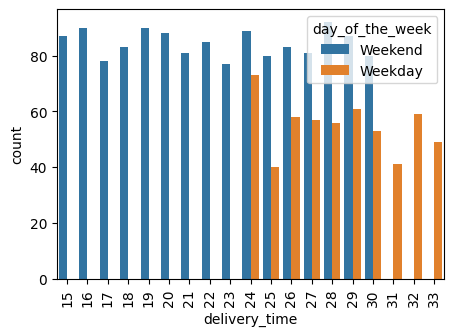

In [483]:
# visual overview
plt.figure(figsize=(5,3.5))
sns.countplot(data=df, x='delivery_time', hue = 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

In [484]:
df_weekend = df[df['day_of_the_week'] == 'Weekend'].copy()
df_weekday = df[df['day_of_the_week'] == 'Weekday'].copy()

mean_weekend = df_weekend['delivery_time'].mean()
mean_weekday = df_weekday['delivery_time'].mean()

print('Mean delivery time on weekends:', round(mean_weekend, 2))
print('Mean delivery time on weekdays:', round(mean_weekday, 2))

Mean delivery time on weekends: 22.47
Mean delivery time on weekdays: 28.34


#### Observations:

The bar graph initially leads us to assume that it will take orders less time to be delivered on weekends than on weekdays.

Our calculations help us conlude that this is indeed true.

*   Mean delivery time on weekends: **22.47**
*   Mean delivery time on weekdays: **28.34**

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  We have a very large dataset and seven variables that have helped us conduct our analysis.
*  Most orders are not rated, which may affect or introduce bias into our results.
* None of the numerical variables have a normal distribution, which may influence our ability to analyze and predict events (e.g., via regression models) with our data.
* Based on the number of orders, American food is the most beloved cuisine, while Vietnamese is the least popular.
* Based on the average rating, Spanish food leads with a rating of 4.83. However, it is important to consider the small number of orders for Spanish food, which may introduce bias to this conclusion.
* People prefer to order food during the weekend, and the delivery time is also shorter during this time of the week (around five to six minutes less).
* Orders generally have an average cost of less than 20 dollars.
* Contrary to initial personal assumptions, there seems to be no strong relationship between the cost of an order, the time it takes to prepare, and the time it takes to deliver.
* 99.52% of restaurants are charged by the company for its services. This serves as a significant source of income, with the company generating a total of $6166.30 from its charging policies.
* On average, it takes an order 24.16 minutes to arrive at its destination. If we include both preparation and delivery, this time increases to around 51 minutes. 10.54% of orders take more than an hour to be delivered.

### Recommendations:

* The company should concentrate its activity and work heavily with the more favorable restaurants, based on cuisine rankings. Enhancing service quality for customers that order from these restaurants might increase profits and customer loyalty.
* The company should look for ways to further decrease its delivery time.
* The company charges too much for its services. I recommend it lowers the charges and finds other ways of generating profit as well. This certainly puts the company in a more difficult position. However, if done properly, this strategy may also help in a competitive market, being the cheapest option for restaurants to have their food delivered.
* The company seems to do pretty well. Perhaps, it could also start implementing other business practices to increase its profits (marketing strategies, etc.)

---